# Demo of data visualization on popular female names clustering results

In [1]:
import netstruct_vis as ns_vis
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataPath = "data/"

**Extract hierarhical tree from NetStruct output files**

In [3]:
belonging_map, parent_map, child_map, node_list, G_whole = ns_vis.extractTree(dataPath+"NS_output_demo_fname/")

**Load meta information on individuals**

In [4]:
df_meta = pd.read_csv(dataPath+"sample_data_fname_meta.csv",index_col=0)
df_meta.head()

,name,syllables,state,fraction
0,Mary,2,PA,0.084196
1,Anna,2,PA,0.134591
2,Emma,2,TX,0.079107
3,Elizabeth,4,NY,0.091867
4,Minnie,2,AL,0.088440


**Plot the complete tree using the gradient coloring scheme**

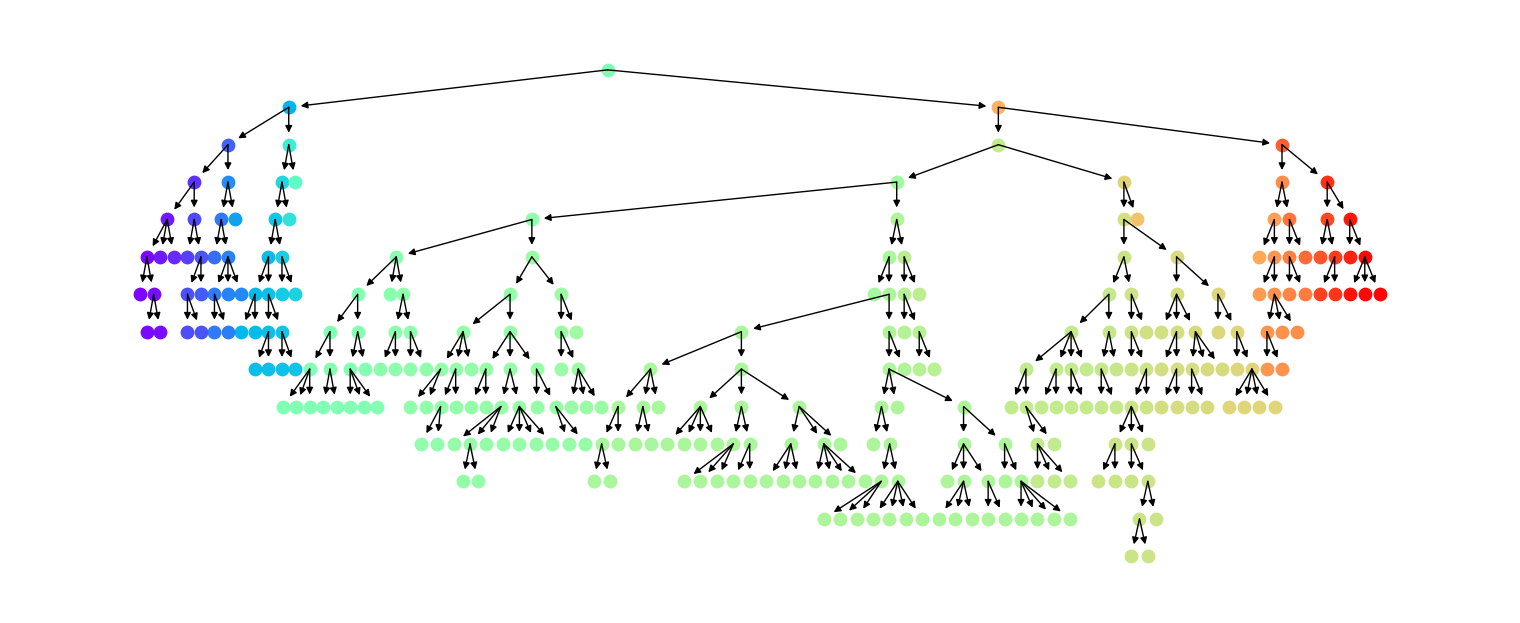

In [5]:
cmap = plt.cm.rainbow
fig_test, G, color_int_map  = ns_vis.plotSubTree(child_map, belonging_map, cmap, root='0-0-0', 
                                                 tree_aspect=3, label_node=False,node_size=80, figsize=(15,8),dpi=100)


**Visualize the hierarchical tree with nodes being pie charts of the categorical attribute *majority state***

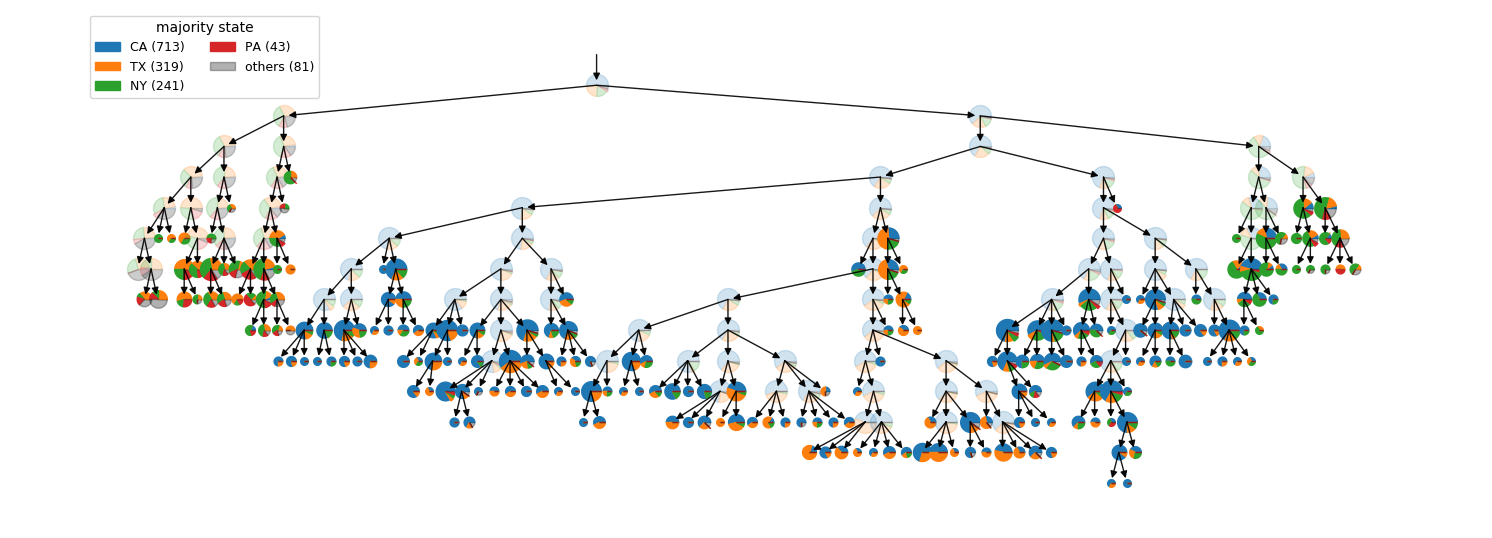

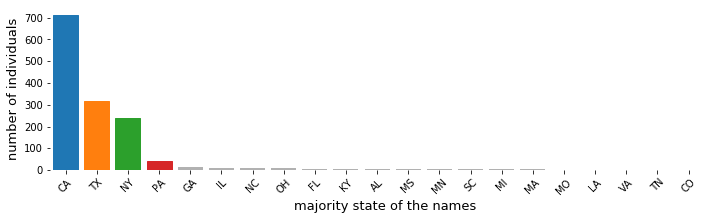

In [6]:
top_num = 4
col_lb = 'state'
cmap_pie = plt.cm.get_cmap('tab10', 10)

fig, labels_cnt, labels_top, colors = ns_vis.plotTreeWithPie(G_whole, belonging_map, df_meta, col_lb, top_num, cmap_pie, 
                                                 tree_aspect=2.5, size_cut=250, size_scale=10, title="majority state", 
                                                 ncol=2, loc="upper left", prop={'size': 9}, bbox_to_anchor=[0.05, 1])
fig_dist = ns_vis.plotLbDist(labels_cnt, labels_top, colors, xlab='majority state of the names', figsize=(12,3))
fig.savefig('plots/name_state_pie.png',dpi=70, bbox_inches = 'tight',transparent=True) 
fig_dist.savefig('plots/name_state_dist.png',dpi=70, bbox_inches = 'tight',transparent=True) 

**Visualize the hierarchical tree with nodes colored by the average value of attribute *syllable count***

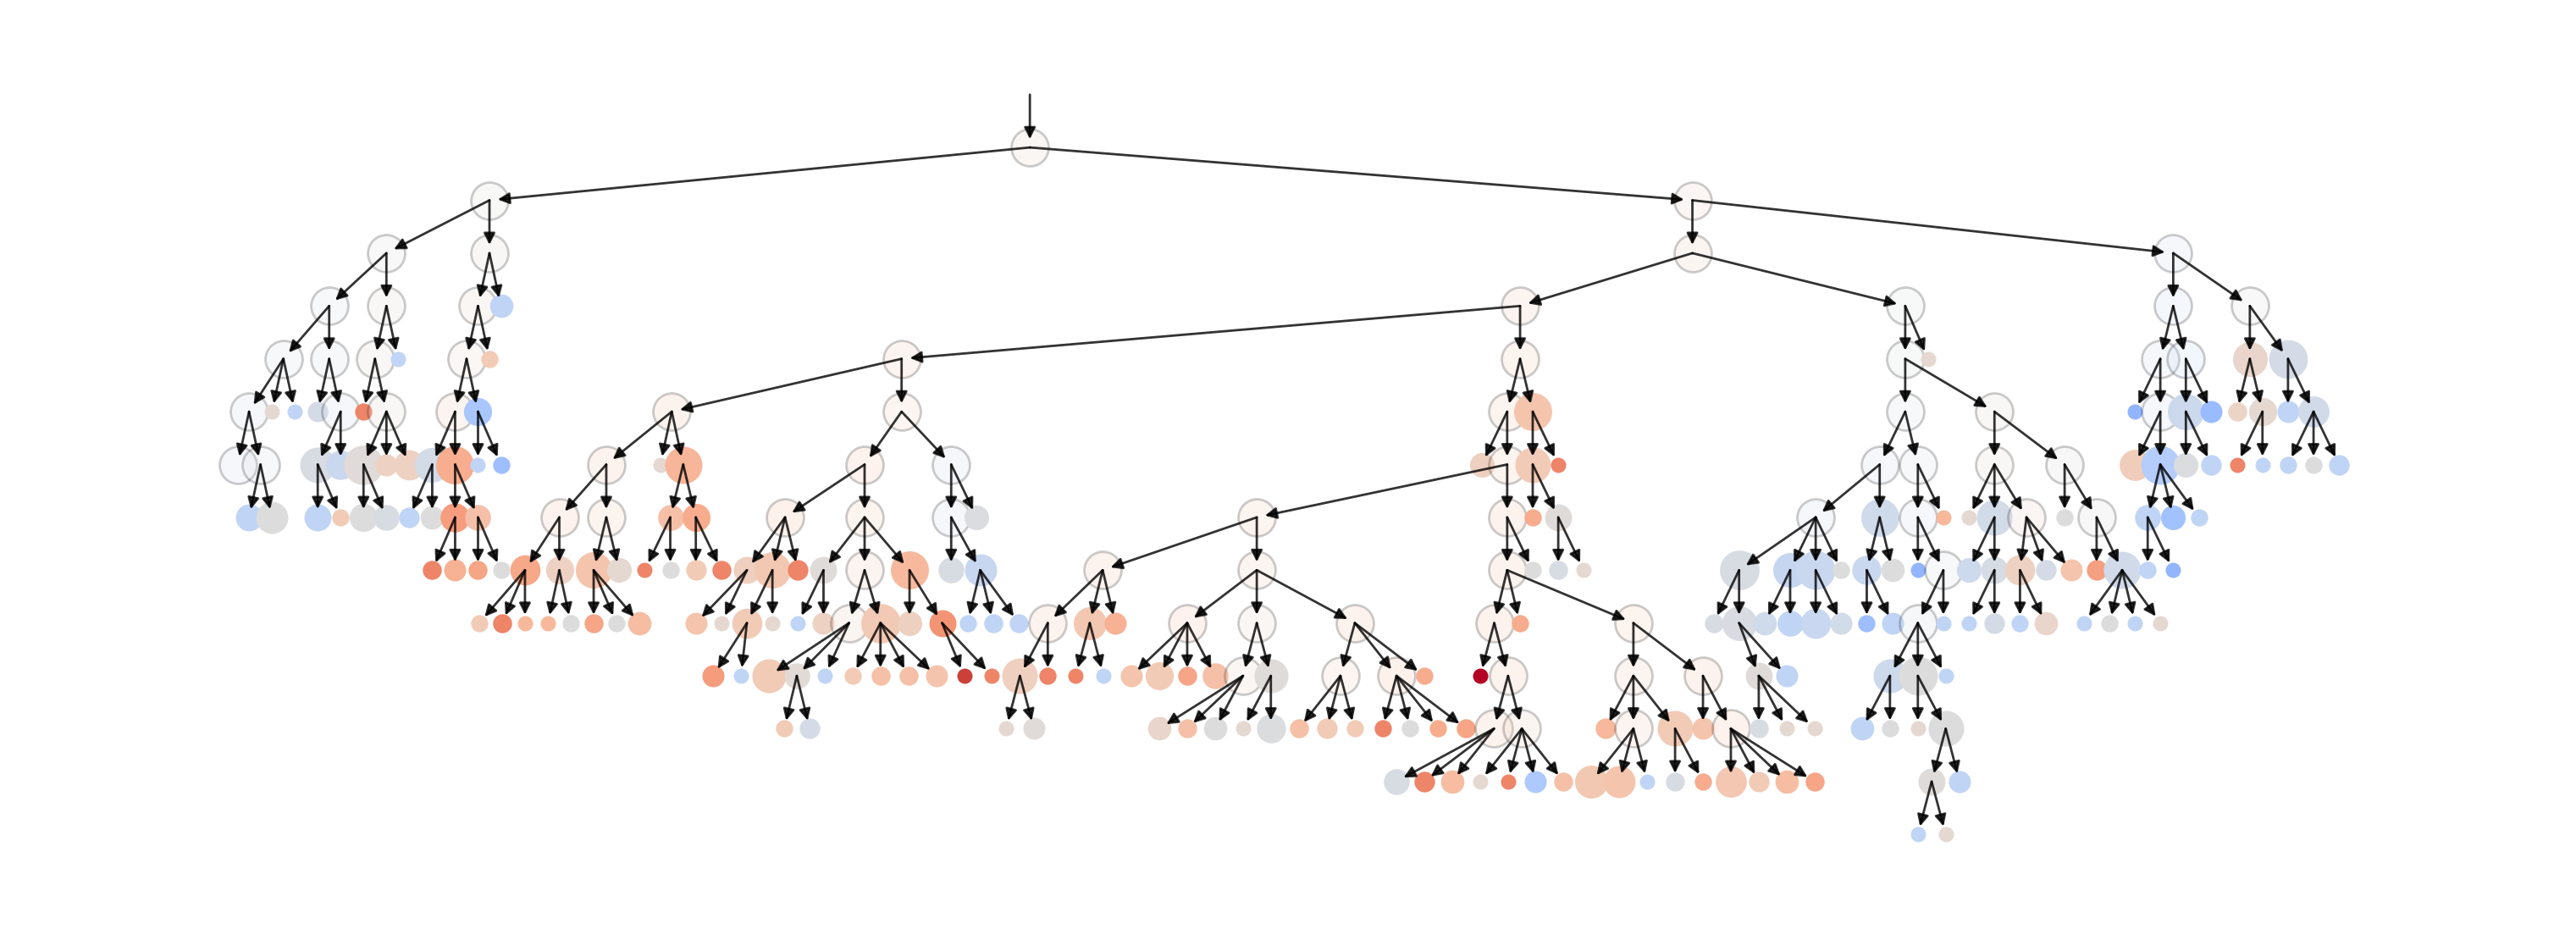

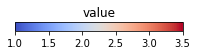

In [7]:
cmap_mean = plt.get_cmap("coolwarm")
col_lb = 'syllables'

fig_mean, fig_cb = ns_vis.plotTreeWithMeanVal(G_whole,belonging_map,df_meta,col_lb,cmap_mean,
                                              tree_aspect=2.5, color_min=1.0,color_scale=2.5,figsize=(20,7),dpi=200)